In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import getpass
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

from tqdm import tqdm

username = getpass.getuser()
sys.path.append(f'../')

from src.support_models import MetricLearner

In [17]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=200, n_features=768, n_informative=3,
                           n_classes=4, n_clusters_per_class=1, random_state=0)

X.shape, Y.shape

((200, 768), (200,))

# Fits and plots

In [18]:
def scatter(x, labels, title, subtitle=None):
    palette = np.array(sns.color_palette("hls", 4))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0,alpha = 0.5, s=40, c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.title(title)

(200, 2) (200,)


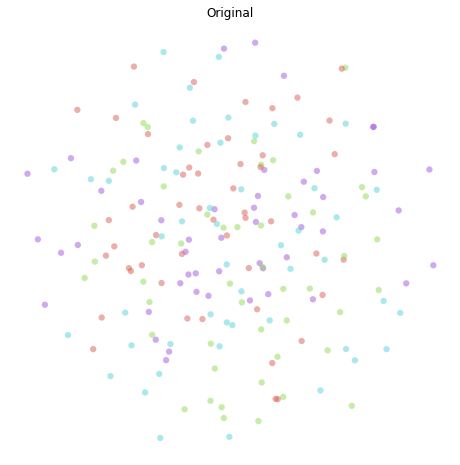

In [19]:
tsne = TSNE()
X_orig = tsne.fit_transform(X)
print(X_orig.shape, Y.shape)
scatter(X_orig, Y, 'Original')

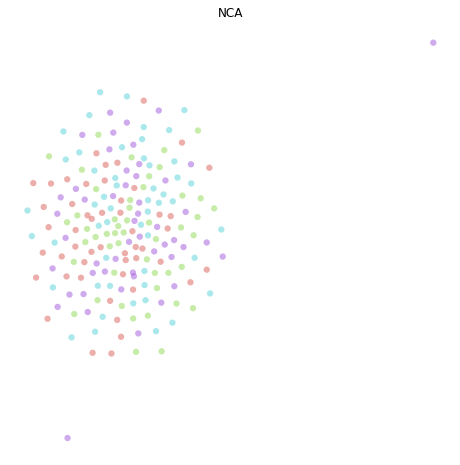

In [20]:
mlearner = MetricLearner('NCA')
X_transformed = mlearner.fit_transform(X, Y)

tsne = TSNE()
try:
    X_reduced = tsne.fit_transform(X_transformed)
except ValueError as e:
    print(mltool_name, e)
#print(X_reduced.shape, Y.shape)
scatter(X_reduced, Y, "NCA")

/home/kaigorodov/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 24s 1s/step - loss: 0.2099
Epoch 2/10
20/20 [==============================] - 22s 1s/step - loss: 0.0475
Epoch 3/10
20/20 [==============================] - 22s 1s/step - loss: 0.0129
Epoch 4/10
20/20 [==============================] - 22s 1s/step - loss: 0.0080
Epoch 5/10
20/20 [==============================] - 22s 1s/step - loss: 0.0070
Epoch 6/10
20/20 [==============================] - 22s 1s/step - loss: 0.0048
Epoch 7/10
20/20 [==============================] - 22s 1s/step - loss: 0.0021
Epoch 8/10
20/20 [==============================] - 22s 1s/step - loss: 9.5595e-04
Epoch 9/10
20/20 [==============================] - 22s 1s/step - loss: 6.1021e-04
Epoch 10/10
20/20 [==============================] - 22s 1s/step - loss: 5.7372e-04


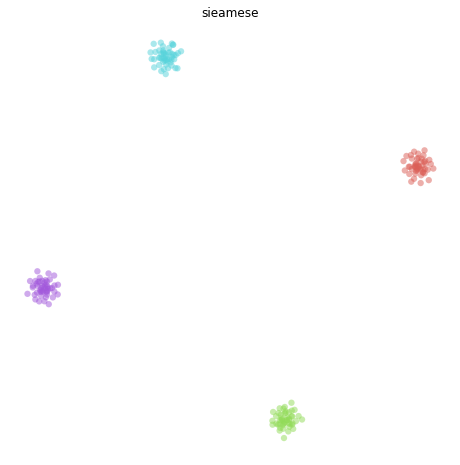

In [25]:
mlearner = MetricLearner('sieamese')
X_transformed = mlearner.fit_transform(X, Y)

tsne = TSNE()
try:
    X_reduced = tsne.fit_transform(X_transformed)
except ValueError as e:
    print(mltool_name, e)
#print(X_reduced.shape, Y.shape)
scatter(X_reduced, Y, "sieamese")